In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cifar10
import matplotlib.pyplot as plt

In [0]:
cifar10.data_path = "data/CIFAR-10/"

In [5]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [6]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [8]:
images_train.shape

(50000, 32, 32, 3)

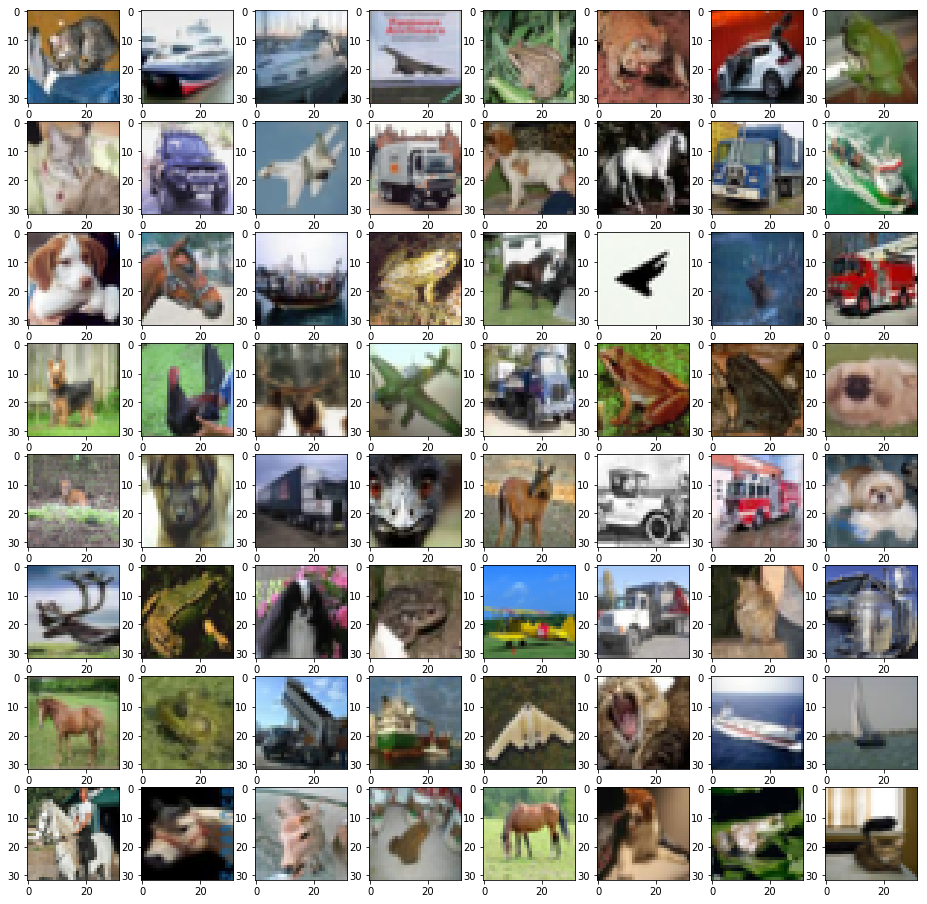

In [9]:
fig = plt.figure(figsize = (16,16))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(images_test[i])
plt.show()

In [0]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

In [0]:
x_train = images_train.reshape((images_train.shape[0], -1))
x_test = images_test.reshape((images_test.shape[0], -1))

In [0]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
x_train.shape

(50000, 3072)

In [14]:
pca_cifar10 = PCA(random_state = 0)
pca_cifar10.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
k = 0 
total = 0 
while total < 0.99:
    total += pca_cifar10.explained_variance_ratio_[k]
    k += 1
k

662

In [0]:
PCA_cifar10 = PCA(n_components = k ,whiten = True)
pca_train = PCA_cifar10.fit_transform(x_train)
pca_test = PCA_cifar10.transform(x_test)

In [17]:
pca_train.shape,pca_test.shape

((50000, 662), (10000, 662))

In [0]:
from sklearn import svm

In [19]:
clf = svm.SVC()
clf.fit(pca_train,cls_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
pred = clf.predict(pca_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(pred,cls_test))
print(confusion_matrix(pred,cls_test))
print(clf.score(pca_test,cls_test))

              precision    recall  f1-score   support

           0       0.53      0.56      0.54       943
           1       0.64      0.50      0.56      1266
           2       0.35      0.39      0.37       904
           3       0.35      0.34      0.35      1029
           4       0.38      0.45      0.41       848
           5       0.36      0.40      0.38       906
           6       0.51      0.53      0.52       968
           7       0.49      0.56      0.52       877
           8       0.60      0.64      0.62       934
           9       0.61      0.46      0.53      1325

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.48     10000
weighted avg       0.49      0.48      0.48     10000

[[527  40  86  22  37  20  14  25 119  53]
 [ 66 637  45  59  26  47  60  60  84 182]
 [ 58   8 355  84 156  86  80  47  20  10]
 [ 27  21  96 355  71 220 108  75  37  19]
 [ 20  12 115  62 382  83  81  75  11   7]
 [ 14  17  73 187  86 358 

In [0]:
import pandas as pd

In [0]:
submission_values = []
for i in pred:
  submission_values.append(class_names[i]) 
pd.DataFrame(submission_values).to_csv("cifar10out.csv", header=None, index=None) 

In [24]:
set(submission_values)

{'airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck'}